# Compartimentalization 

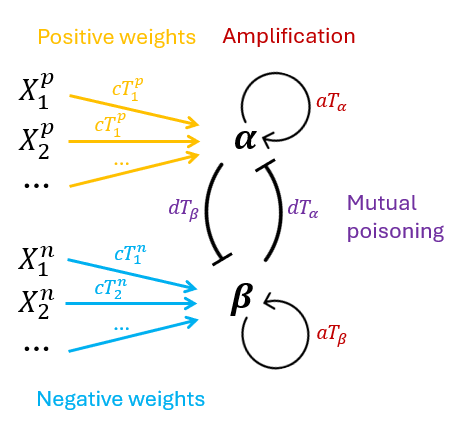

## 1-Theory
In this section, previsouly called quantities "$X_i^p$" and "$X_j^n$" are  the number of positive particle of type $i$ and negative particle of tpe $j$ in the bulk phase, whereas  "$k_i$" and "$l_j$" are the same quantities for the species $i$ and $j$ but in a droplet.

### Hypothesis and possible improvements
-We first only consider noise over entries and not over reaction, the latter would have lead us to consider Gillespi simultion.

-We consider quantities of A and B to be *high enough* to consider the linearized version of our equation, i.e. the following one.


-Our previous equations were over concentrations a and b. Nevertheless, one would think in term of number of particles. Therefore, we shall have the number of particle A=aV and B=bV as a function of the characteristic volume V of a droplet. Yet, such a volume can be a random variable...
To adress more simply the problem, we first consider such volume to be constant. Then, we can write $\frac{dA}{dt} = PV + \frac{\lambda_a \cdot A }{1 + k_a/V \cdot A} - \eta_a \cdot A - \mu_a/V \cdot A B$. Provinding the rescaling $P/V\rightarrow P$, $k_a / V\rightarrow k_a$ and $\mu_a /V \rightarrow \mu_a$, one can write the stoechiometric version of the system 



$$
\frac{dA}{dt} = P + \frac{\lambda_a \cdot A}{1 + k_a \cdot A} - \eta_a \cdot A - \mu_a \cdot AB
$$
$$
\frac{dB}{dt} = N + \frac{\lambda_b \cdot B}{1 + k_b \cdot B} - \eta_b \cdot B - \mu_b \cdot AB
$$

Where:
- $A,B$: number of particles
- $P=\sum_i w_i^pk_i, N=\sum_j w_j^n l_j $: external input/production rates
- $\lambda_a, \lambda_b$: growth rate constants
- $k_a, k_b$: saturation constants (Hill-type terms)
- $\eta_a, \eta_b$: decay or dilution rates
- $\mu_a, \mu_b$: interaction strengths between $a$ and $b$

We nevertheless keep the notation $A\rightarrow a$ and $B\rightarrow b$ for simplicity.

### 1.1 Joint Probability

In the bulk, there are multiple “positive” (blue squares and rectangles) and “negative” (yellow squares and rectangles) DNA species serving as inputs. This distribution is described by the vectors $\vec{X}_1 = (\#~\text{positive species 1},~\#~\text{positive species 2},~...)$ and $\vec{Y}_1 = (\#~\text{negative species 1},~\#~\text{negative species 2},~...)$, representing the number of positive and negative input species in the bulk, as illustrated in Figure \ref{fig:legend neural network}. The subscript in the bulk vectors refers to the first-layer inputs.

The solution is then compartmentalized into droplets during the \textit{inoculation phase}. The number of positive and negative species within each droplet is a random variable. The resulting distribution of input species in droplets is denoted by $\vec{x}$ and $\vec{y}$, which are the droplet analogues of the bulk vectors $\vec{X}$ and $\vec{Y}$.

Thus, the joint probability of having $n$ total particles in a compartment (with average $\lambda$), $m$ of which are from the positive class (and $n - m$ from the negative), and with specific species distributions $\vec{x}$ and $\vec{y}$, is given by:

$$
P_{\lambda}(n, m, \vec{x}, \vec{y}) =
\underbrace{e^{-\lambda} \frac{\lambda^n}{n!}}_{\text{Poisson: total count}}
\cdot
\underbrace{\binom{n}{m} r^m (1 - r)^{n - m}}_{\text{Binomial: } m | n}
\cdot
\underbrace{\frac{m!}{\prod_i x_i!} \prod_i (p_i)^{x_i}}_{\text{Multinomial: } \vec{x} | m}
\cdot
\underbrace{\frac{(n - m)!}{\prod_j y_j!} \prod_j (q_j)^{y_j}}_{\text{Multinomial: } \vec{y} | n - m}
$$

where we have defined $r=\frac{\sum_i X_i}{\sum_i(X_i+Y_j)}$ as the probability that a randomly chosen DNA among the n is of class P. We also define the probability of a positive and negative input of species $i$ as $p_i=\frac{X_i}{\sum_iX_i}$ and $q_i=\frac{Y_i}{\sum_iY_i}$, both being normalized and with constraints $\sum_ix_i=m$ and $\sum_jy_j=n-m$.
The compartmentalization dynamics is given below. 

### 1.3 Compartimentalization dynamic
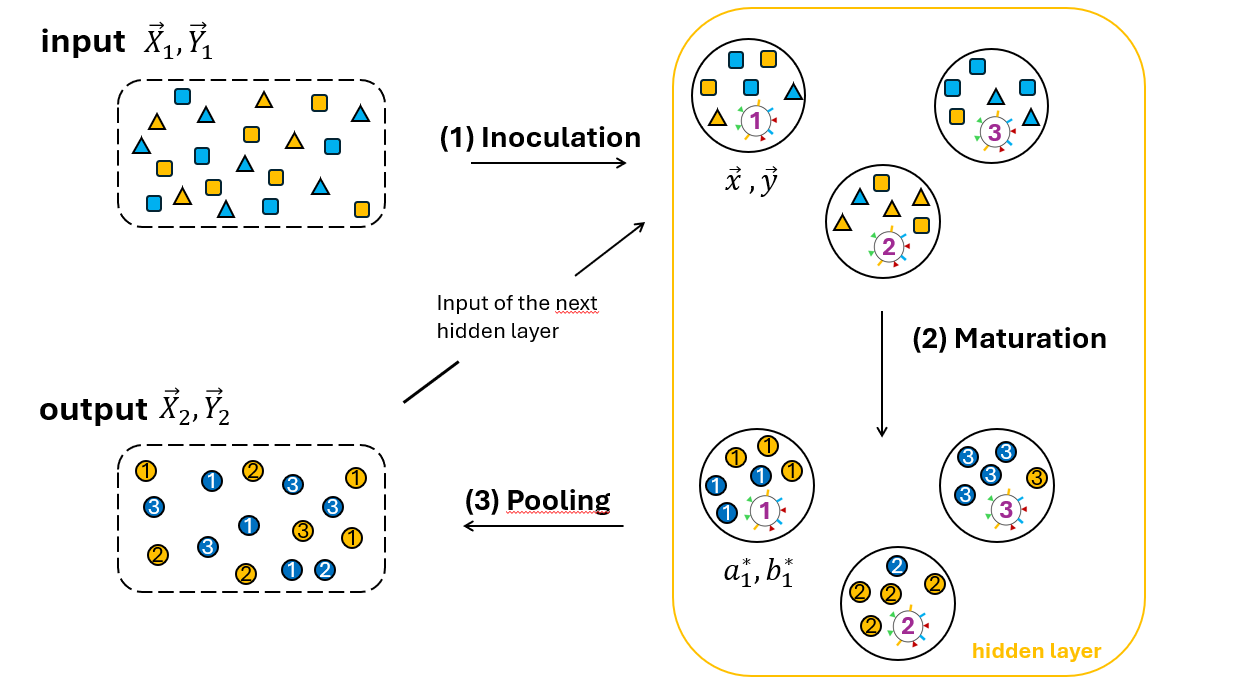
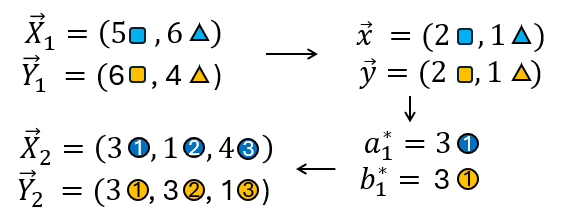

⚠️ Dans nos travaux, nous avons considéré que les templates étaient fixés sur la bille et que les brins d'ADN étaient en solution au moment d'être capturés dans les billes par compartimentalisation. En réalite, c'est l'inversion : les templates sont en introduits en concentrations voulues dans chaques gouttes par l'experimentateur, et ce sont les billes qui capturent les brins d'ADN dans la solution. Cela ne change rien à notre analyse mais c'est un point experimental important.

Note that any arbitrary classification task can be achieved by a
 feedforward neural network with one hidden layer [9], and can
 be realized in our proposed system by settingcorresponding con centrations in the followingsystematicway, thus reconfigurable.
The input layer consists of two inputs u1 and u2; the output
 layer requires log2(numberofclasses) neurons.Each neuron in
 the hidden layer can define a separating hyperplane in the input
 space, so the number of required neurons equals the number of
 distinct inequalities involved in the criterion specified.[paper_François_Fage]

**How much neuron and layer do we need?**

Let us take a classification task with *n* entries (ex characteristic of a disease ) associated with *k* classes (ex tumor or not tumor )

 **1.Hidden Layers**
 
- The number of hidden layers (network *depth*) and the number of neurons per layer (network *width*) depend on the *complexity of the task*:
  - *1 hidden layer* is sufficient to approximate any continuous function (Universal Approximation Theorem), but might require a very large number of neurons.
  - *2–4 hidden layers* are common in practice for moderately complex classification tasks.
  
  - Hidden layers often have between *`n` and `2n` neurons*, though this is a heuristic.
  - Decreasing layer sizes (e.g., `[2n, n]`) may help guide information compression.

**2.Activation Functions**

- *Hidden layers*: If possible we use nonlinear functions to enable complex representations, whose most common is ReLU, yet other options include sigmoid and Heaviside (this is our case), tanh, leaky relu...


- *Output layer*: Since we are doing *binary classification*, we use in theory *sigmoid* function (which is empirically obtained in the case of our chemical reaction), which gives a probability between 0 and 1. In practice, as *on* or *off* fp are attractor, far from the decision boundary, the sigmoid function is approximated by an heavisde function 0 or 1. 

**3. Output Layer**
The number of neuron in the output layer an the associated activation function are reported un the following table. In our case, for a binary classification, the output layer will consists in 1 neuron whose activation function is an approximated heaviside function.


| Task Type             | Output Layer                      | Activation Function |
|-----------------------|-----------------------------------|---------------------|
| Binary classification | 1 neuron                          | Sigmoid or Heaviside|
| Multi-class (k > 2)   | `k` neurons                       | Softmax             |
| Multi-label           | `k` neurons                       | Sigmoid             |

The output represents the predicted probability (or score) for each class.


Note : an empirical rule of thumb  is to consider n+k-1 neurons in the first hidden layer. 


## (A) Monolayer neural network

The associated neural network is shown below, consisting of a single layer and producing a binary output $a_i,b_i$ for each neuron (recent discussions suggest propagating only $a$ instead of both $a$ and $b$, and this new approach will be detailed in a section to come). Below, sticking to the linear classifier, for each neuron,the decision boundary is given by $P>N+\theta$ where the treshold $\theta=f(a_0,b_0)$ is a function of initial concentrations of $a$ and $b$.

Because of stochasticity, the only deifference with a usual neural network is that the inputs $x_1,y_1$ of a neuron are sampled upon the bulk inputs $X_1,Y_1$ according to the distribution s.t. $x_1,y_1 \sim P_{\lambda}$

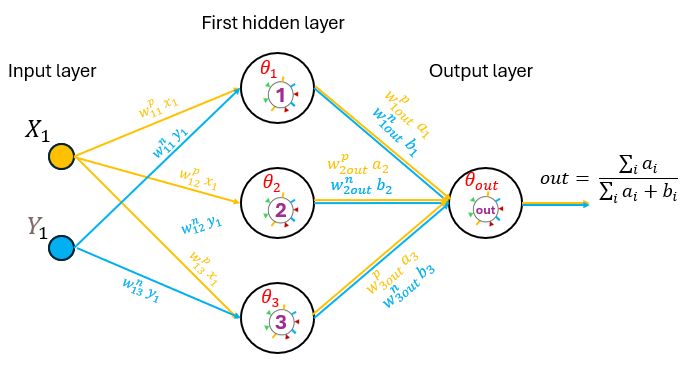


The input layer consists of two inputs, $X_1$ and $Y_1$, which represent the number of positive and negative species in the bulk. These inputs are then randomly distributed into droplets. In other words, for each droplet $j$, we assign an input $(x_i, y_i) \sim P_{\lambda}$ according to the probability distribution $P_\lambda$.

Each droplet has its own weights $w^p_{ij}, w^n_{ij}$, which are functions of the template concentrations on the bead, tunable by the experimenter. Each droplet $j$ thus computes the weighted sums of positive and negative inputs $P = \sum_i w^p_{ij} x_i$, $N = \sum_i w^n_{ij} y_i$. The activation threshold of each droplet $j$ is given by $\theta_j = f(a_j(0), b_j(0))$, a function of the initial amounts of species $a_j$ and $b_j$ in droplet $j$.

The concentrations $a_j$ and $b_j$ in each droplet then evolve according to the dynamics $\frac{da_j}{dt}$,$\frac{db_j}{dt}$ until the system reaches the fixed point $(a_j^*, b_j^*)$. In this configuration, each droplet $j$ outputs a binary signal composed of the two species $(a_j^*, b_j^*)$ (we will omit the $^*$ for simplicity).

If we define the output of each neuron as the final concentration of $a_j$, then neuron $j$ is considered *activated* if $P - N \geq \theta(a_j(0), b_j(0))$ which corresponds to the output being greater than 0.5, i.e., $\text{output}_j > 0.5$.


The output layer consists of a *single neuron*, since we are performing *binary classification*. It takes as input the positive species $(a_1, a_2, a_3)$ and the negative species $(b_1, b_2, b_3)$ from the previous layer. Each input is associated with its own weights $w^p_{j,\text{out}}$ and $w^n_{j,\text{out}}$, again tunable via the template concentrations. The output neuron computes $P = \sum_j w^p_{j,\text{out}} a_j$, $N = \sum_j w^n_{j,\text{out}} b_j$. Its activation threshold is again a function of the initial concentrations $\theta = f(a_{\text{out}}(0), b_{\text{out}}(0))$. We let the system evolve according to $\frac{da_{\text{out}}}{dt}$, $\frac{db_{\text{out}}}{dt}$ until the fixed point $(a_{\text{out}}^*, b_{\text{out}}^*)$ is reached. The output neuron is considered *activated* if $P - N \geq \theta(a_{\text{out}}(0), b_{\text{out}}(0))$ or equivalently if $\text{output}_{\text{out}} > 0.5$.




### A.1 Layer and $\lambda$ dependency of the classification performance

We have the choice to select two pooling methods. The first one ('1') is to sum all output of all neurons without keeping neurons labels, the second one ('2') is to keep the vectorial structure of the output, from the labeling of each neuron. $\lambda$ is the average number of different inputs in a neuron.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import math  # Needed for functions like log, exp, etc.


In [ ]:
# Parametres globaux
lambda_a = 1.0
lambda_b = 1.0
ka = 0.5
kb = 0.5
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2

# Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
approach = 2  # Changez ici pour switcher entre 1 ou 2
# === SIMULATION PARAMETERS ===
n_layers = 2          # Number of layers in the network
n_neurons = 2          # Number of neurons per layer
n_points = 80       # Number of points for x and y grids (50x50 = 2500 points)
# Poids fixes pour tous les neurones
neuron_weights = [(np.random.uniform(0.5, 1.5), np.random.uniform(0.5, 1.5))for _ in range(n_neurons)]
# Test different lambda values
lambda_values = [None, 1.0, 10.0, 60.0,150.0]

In [ ]:
### --- Simulation ---
def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

# Couche commune a l'approche 1 et 2
def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for _ in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        sol = solve_ivp(neuron_dynamics, [0, 50], [0.0, 0.0], args=(x_in, y_in), method='LSODA')
        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

# Approche 1 : outputs sommees a chaque couche
def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)

# Approche 2 : outputs gardes en vecteurs
def simulate_network_vector(X, Y, n_layers, n_neurons, lambda_override=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override)

    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, lambda_override=None):
    """Run simulation for a given lambda value"""
    # --- Grille de simulation ---
    x_vals = np.linspace(0,100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    lambda_str = f"λ={lambda_override}" if lambda_override is not None else "λ=auto"
    iterator = tqdm(range(X_grid.size), desc=f"Simulation {lambda_str}")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(np.array([X_input]), np.array([Y_input]), n_layers, n_neurons, lambda_override)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(X_input, Y_input, n_layers, n_neurons, lambda_override)
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid


Testing λ values with approach 2
Network: 2 layers, 2 neurons per layer
Grid: 80x80 points

Running with λ = auto


Simulation λ=auto: 100%|██████████| 6400/6400 [01:02<00:00, 103.07it/s]



Running with λ = 1.0


Simulation λ=1.0: 100%|██████████| 6400/6400 [00:18<00:00, 343.57it/s]



Running with λ = 10.0


Simulation λ=10.0: 100%|██████████| 6400/6400 [00:49<00:00, 129.67it/s]



Running with λ = 60.0


Simulation λ=60.0: 100%|██████████| 6400/6400 [00:59<00:00, 107.84it/s]



Running with λ = 150.0


Simulation λ=150.0: 100%|██████████| 6400/6400 [01:01<00:00, 104.09it/s]



Generating comparison plot...


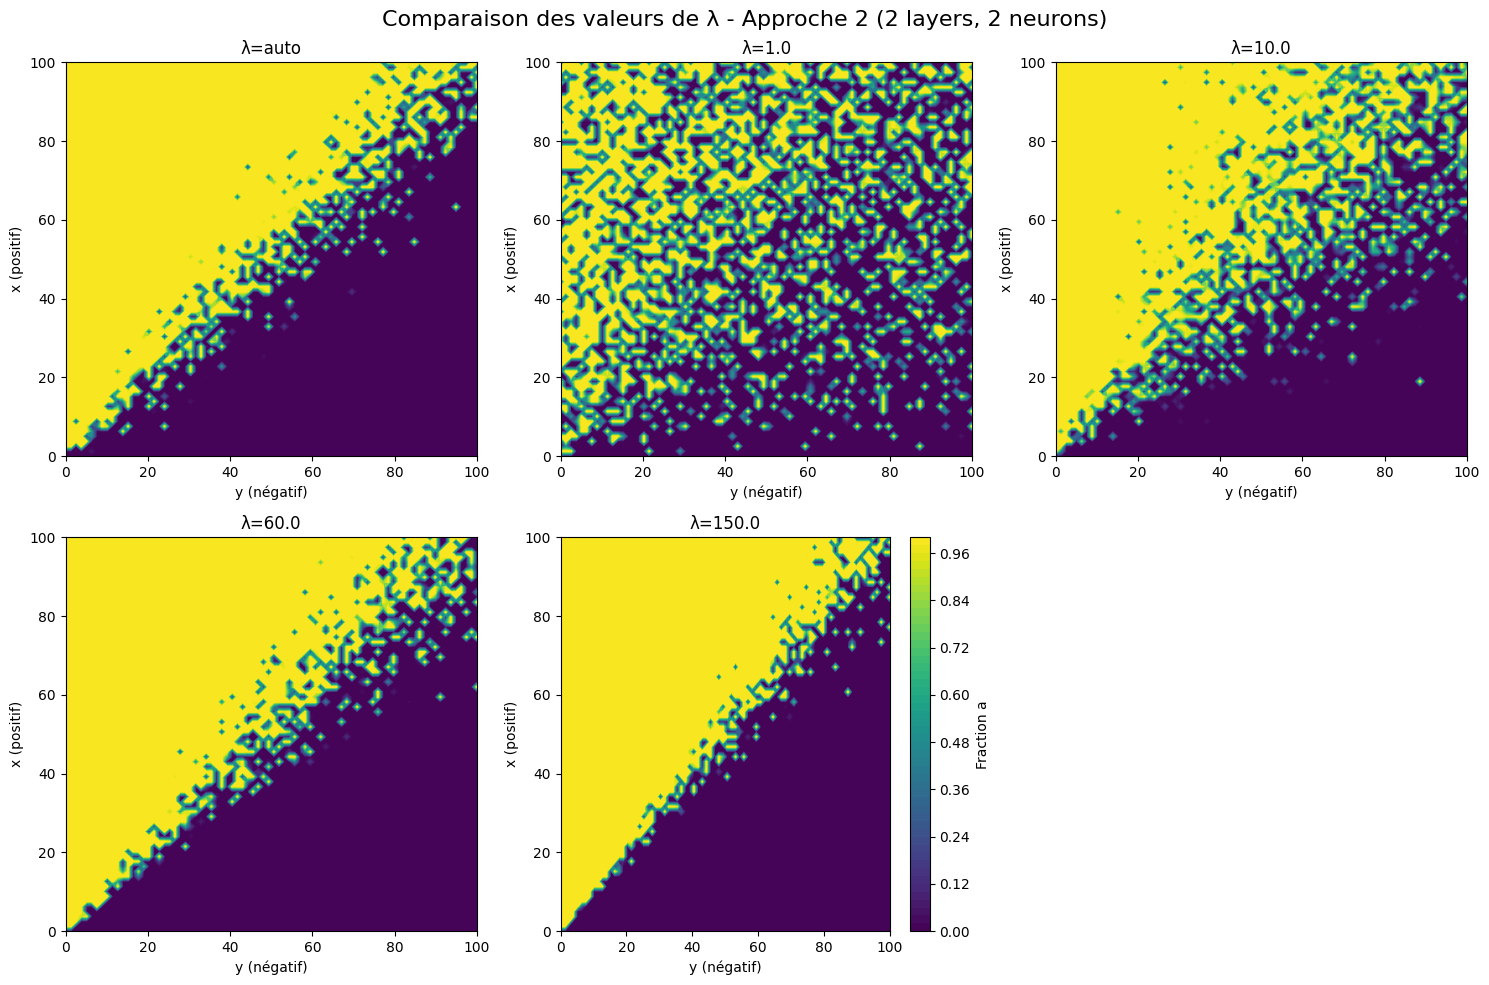


Simulation completed!


In [5]:
# --- Main execution ---
if __name__ == "__main__":

    
    
    print(f"Testing λ values with approach {approach}")
    print(f"Network: {n_layers} layers, {n_neurons} neurons per layer")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)
    
    results = {}
    
    for lambda_val in lambda_values:
        print(f"\nRunning with λ = {lambda_val if lambda_val is not None else 'auto'}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[lambda_val] = (X_grid, Y_grid, Z_grid)
    
    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(lambda_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # toujours obtenir un tableau plat, même pour 1 subplot

    for i, lambda_val in enumerate(lambda_values):
        X_grid, Y_grid, Z_grid = results[lambda_val]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        lambda_str = f"λ={lambda_val}" if lambda_val is not None else "λ=auto"
        axes[i].set_title(lambda_str)
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[i])
    cbar.set_label('Fraction a', fontsize=10)

    # Supprime les axes inutilisés si le nombre de subplots dépasse le nombre de lambda_values
    for j in range(len(lambda_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des valeurs de λ - Approche {approach} ({n_layers} layers, {n_neurons} neurons)', fontsize=16)
    plt.tight_layout()
    plt.show()

print("\nSimulation completed!")

We simulated a single-layer neural network with 3 neurons and plotted the decision boundary for different values of $\lambda$, which represents the average number of inputs received by each neuron. The value $\lambda_{\text{auto}}$ corresponds to the total number of inputs in the bulk divided by the number of neurons. We observe that as $\lambda$ increases, the decision boundary becomes sharper and more clearly defined. This effect arises from the stochastic sampling of the bulk inputs: when $\lambda$ is low, sampling variability introduces uncertainty in the input distribution across neurons, leading to blurred decision boundaries. In contrast, higher values of $\lambda$ reduce the relative impact of sampling noise, resulting in a more stable and precise boundary. This trend is also visible in the plot below, which shows the output profile along the anti-diagonal of the previous graph.



Lancement des simulations le long de la diagonale...


Diag λ=1000.0: 100%|██████████| 120/120 [00:01<00:00, 98.17it/s] 


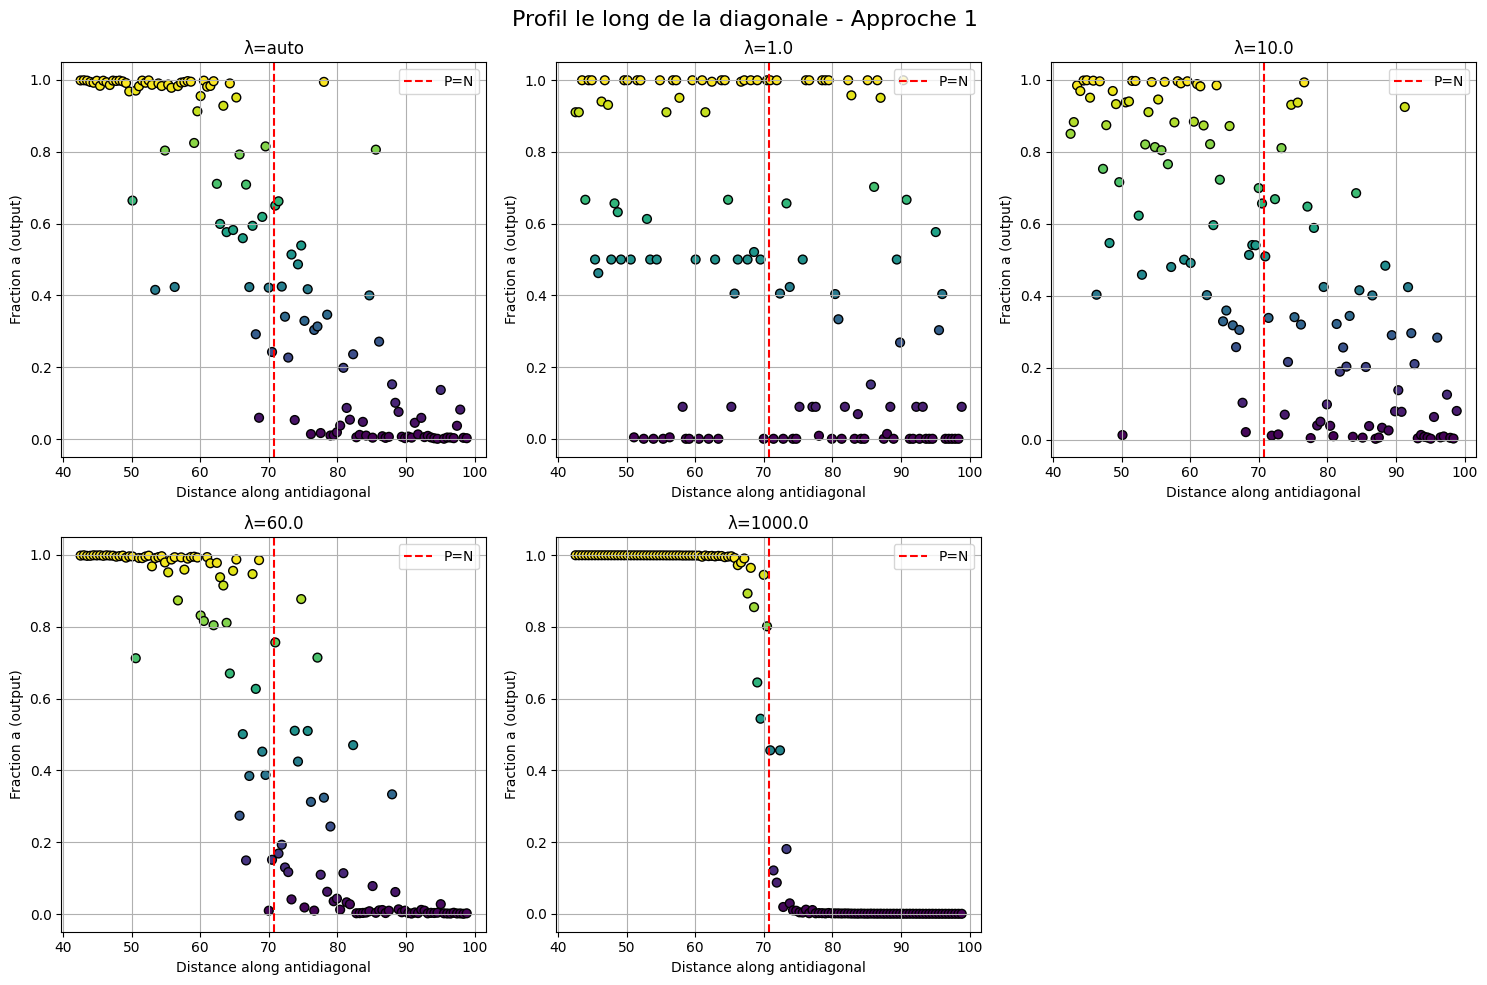

In [ ]:
# --- PARTIE DIAGONALE POUR TOUTES LES VALEURS DE LAMBDA ---

print("\nLancement des simulations le long de la diagonale...")

# Préparation des paramètres diagonaux
max_val = 100
center = max_val / 2
width_fraction = 0.4

diag_length = np.sqrt(2) * max_val
half_window = diag_length * width_fraction / 2

n_diag_points = 300
P_full = np.linspace(max_val, 0, n_diag_points)
N_full = np.linspace(0, max_val, n_diag_points)

dist_full = np.sqrt((P_full - P_full[0])**2 + (N_full - N_full[0])**2)
center_dist = diag_length / 2
mask = (dist_full >= center_dist - half_window) & (dist_full <= center_dist + half_window)

P_diag = P_full[mask]
N_diag = N_full[mask]
dist_diag = dist_full[mask]

# Subplots pour les courbes diagonales
fig_diag, axes_diag = plt.subplots(2, 3, figsize=(15, 10))
axes_diag = axes_diag.flatten()

for i, lambda_val in enumerate(lambda_values):
    Z_diag = []
    desc = f"Diag λ={lambda_val if lambda_val is not None else 'auto'}"
    for P_input, N_input in tqdm(zip(P_diag, N_diag), total=len(P_diag), desc=desc):
        if approach == 1:
            a_final, b_final = simulate_network_sum(np.array([P_input]), np.array([N_input]), n_layers, n_neurons, lambda_override=lambda_val)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(P_input, N_input, n_layers, n_neurons, lambda_override=lambda_val)
        else:
            raise ValueError("Approach must be 1 or 2")

        ratio = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0
        Z_diag.append(ratio)

    Z_diag = np.array(Z_diag)
    
    ax = axes_diag[i]
    sc = ax.scatter(dist_diag, Z_diag, c=Z_diag, cmap='viridis', s=40, edgecolor='black')
    ax.axvline(x=center_dist, color='red', linestyle='--', linewidth=1.5, label='P=N')
    lambda_str = f"λ={lambda_val}" if lambda_val is not None else "λ=auto"
    ax.set_title(lambda_str, fontsize=12)
    ax.set_xlabel('Distance along antidiagonal')
    ax.set_ylabel('Fraction a (output)')
    ax.legend(fontsize=10)
    ax.grid(True)

# Supprimer les axes inutiles si <6 lambdas
for j in range(len(lambda_values), len(axes_diag)):
    fig_diag.delaxes(axes_diag[j])

plt.suptitle(f'Profil le long de la diagonale - Approche {approach}', fontsize=16)
plt.tight_layout()
plt.show()



We can also probe how does the boundary decision evolves with the number of hidden layers.

Testing different layer counts with λ = None and approach 2
Network: 3 neurons per layer
Grid: 50x50 points

Running with n_layers = 1


Simulation λ=auto: 100%|██████████| 2500/2500 [00:11<00:00, 210.14it/s]



Running with n_layers = 2


Simulation λ=auto: 100%|██████████| 2500/2500 [00:21<00:00, 118.80it/s]



Running with n_layers = 3


Simulation λ=auto: 100%|██████████| 2500/2500 [00:26<00:00, 93.32it/s]



Running with n_layers = 5


Simulation λ=auto: 100%|██████████| 2500/2500 [00:36<00:00, 68.26it/s]



Generating comparison plot...


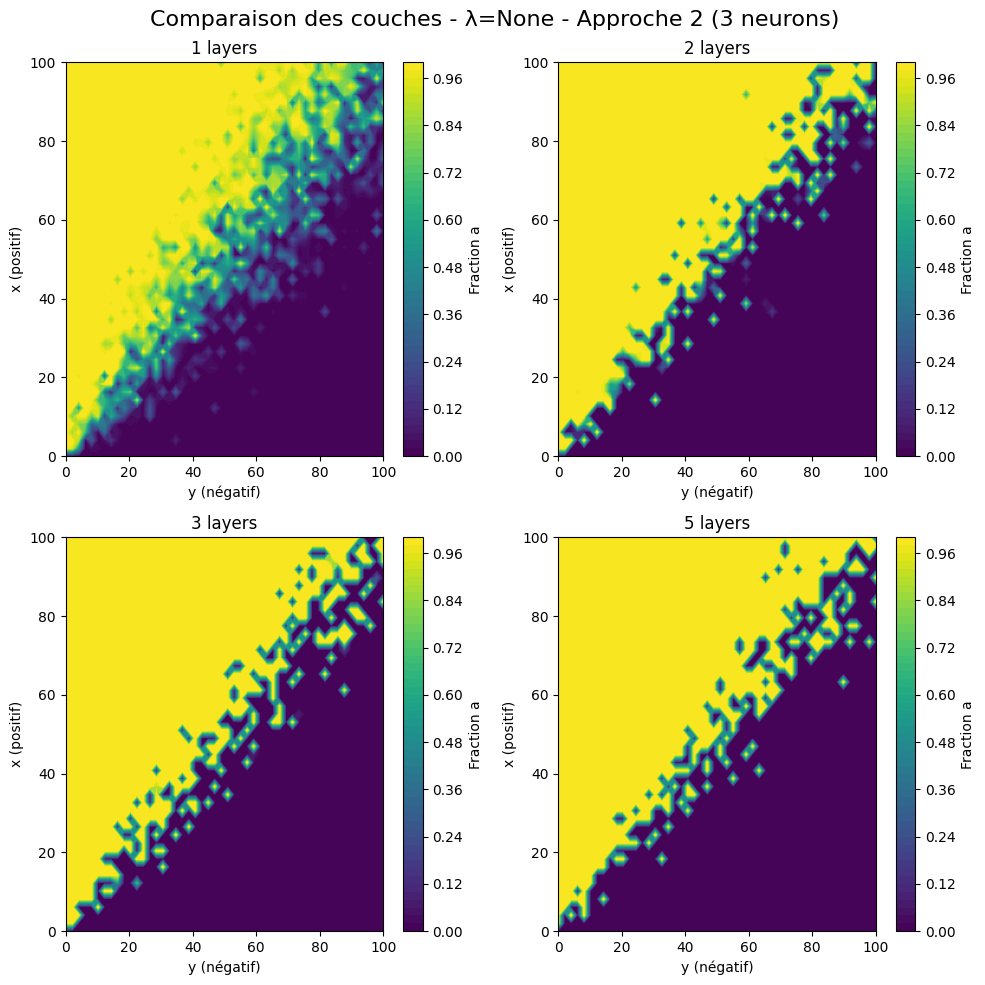


Simulation completed!


In [ ]:
# --- Main execution ---
if __name__ == "__main__":
    import math  # à ajouter si pas déjà importé

    # Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
    approach = 2  # Changez ici pour switcher entre 1 ou 2

    # === SIMULATION PARAMETERS ===
    n_neurons = 3          # Nombre de neurones par couche
    n_points = 50          # Nombre de points pour x et y (50x50)
    #lambda_val = None # Fixe une seule valeur de lambda pour cette analyse

    layer_values = [1, 2, 3, 5]  # Valeurs de n_layers à tester

    print(f"Testing different layer counts with λ = {lambda_val} and approach {approach}")
    print(f"Network: {n_neurons} neurons per layer")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)

    results = {}

    for n_layers in layer_values:
        print(f"\nRunning with n_layers = {n_layers}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[n_layers] = (X_grid, Y_grid, Z_grid)

    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(layer_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # Pour gérer le cas n_layers = 1

    for i, n_layers in enumerate(layer_values):
        X_grid, Y_grid, Z_grid = results[n_layers]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        axes[i].set_title(f"{n_layers} layers")
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i])
        cbar.set_label('Fraction a', fontsize=10)

    # Supprimer les axes inutilisés
    for j in range(len(layer_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des couches - λ={lambda_val} - Approche {approach} ({n_neurons} neurons)', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\nSimulation completed!")


We indeed have that the more we add layers, the more defined will be the decision boundary. We can see if adding neuron improves the decision boundary or not.

Testing different neuron counts with λ = None and approach 2
Network: 3 layers
Grid: 50x50 points

Running with n_neurons = 1


Simulation λ=auto: 100%|██████████| 2500/2500 [00:09<00:00, 276.63it/s]



Running with n_neurons = 3


Simulation λ=auto: 100%|██████████| 2500/2500 [00:25<00:00, 96.48it/s] 



Running with n_neurons = 10


Simulation λ=auto: 100%|██████████| 2500/2500 [01:28<00:00, 28.26it/s]



Running with n_neurons = 30


Simulation λ=auto: 100%|██████████| 2500/2500 [04:39<00:00,  8.94it/s]



Generating comparison plot...


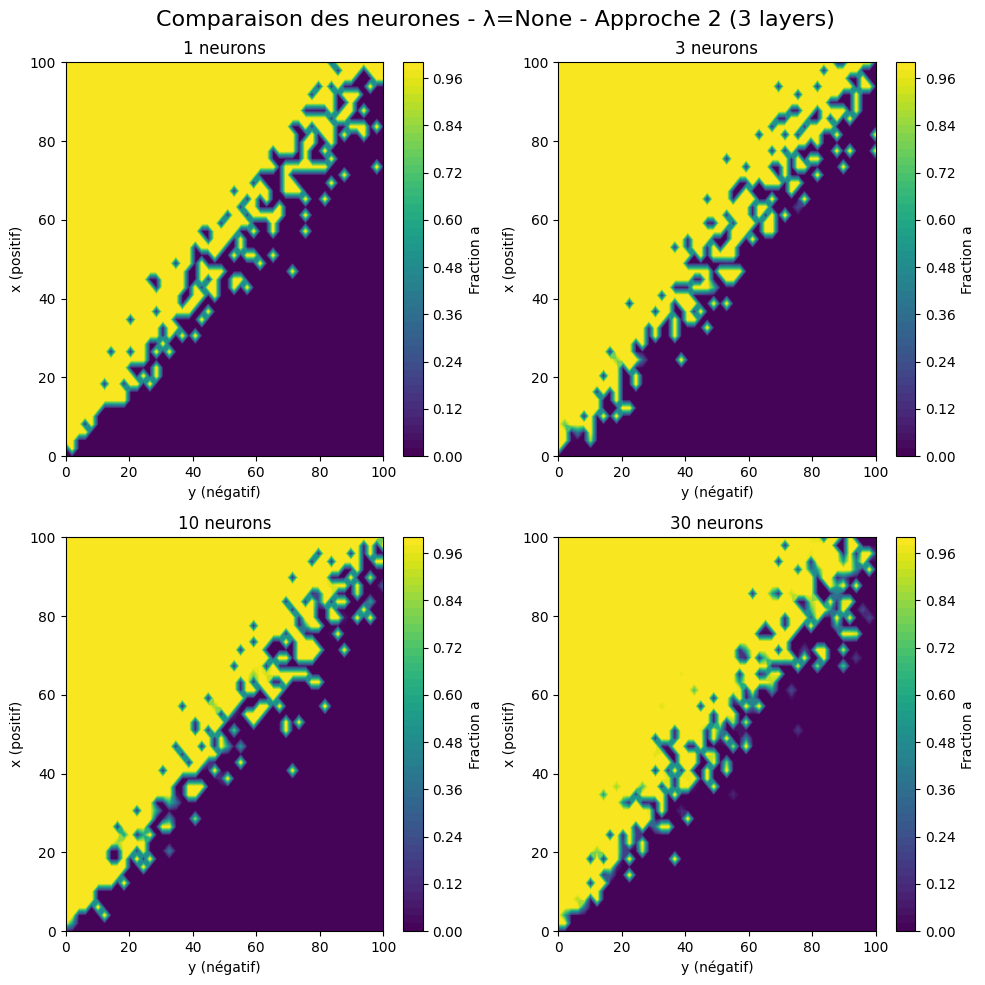


Simulation completed!


In [ ]:
# --- Main execution ---
if __name__ == "__main__":
    import math  # à ajouter si pas déjà importé
    import matplotlib.pyplot as plt
    import numpy as np

    # Choix de l'approche: 1 = somme (approche 1), 2 = vectorielle (approche 2)
    approach = 2  # Changez ici pour switcher entre 1 ou 2

    # === SIMULATION PARAMETERS ===
    n_layers = 3          # Nombre de couches fixé (constante)
    n_points = 50         # Nombre de points pour x et y (50x50)
    # lambda_val doit être défini quelque part avant, sinon fixez-le ici
    # lambda_val = 0.5  

    neuron_values = [1, 3,10,30]  # Différents nombres de neurones à tester

    print(f"Testing different neuron counts with λ = {lambda_val} and approach {approach}")
    print(f"Network: {n_layers} layers")
    print(f"Grid: {n_points}x{n_points} points")
    print("=" * 50)

    results = {}

    for n_neurons in neuron_values:
        print(f"\nRunning with n_neurons = {n_neurons}")
        
        # Run simulation
        X_grid, Y_grid, Z_grid = run_simulation(n_layers, n_neurons, n_points, lambda_val)
        
        # Store results
        results[n_neurons] = (X_grid, Y_grid, Z_grid)

    # Plot comparison
    print("\nGenerating comparison plot...")

    n_plots = len(neuron_values)
    n_cols = math.ceil(math.sqrt(n_plots))
    n_rows = math.ceil(n_plots / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
    axes = np.atleast_1d(axes).flatten()  # Pour gérer le cas n_plots = 1

    for i, n_neurons in enumerate(neuron_values):
        X_grid, Y_grid, Z_grid = results[n_neurons]

        im = axes[i].contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)

        axes[i].set_title(f"{n_neurons} neurons")
        axes[i].set_xlabel('y (négatif)')
        axes[i].set_ylabel('x (positif)')

        # Add colorbar
        cbar = plt.colorbar(im, ax=axes[i])
        cbar.set_label('Fraction a', fontsize=10)

    # Supprimer les axes inutilisés
    for j in range(len(neuron_values), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Comparaison des neurones - λ={lambda_val} - Approche {approach} ({n_layers} layers)', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\nSimulation completed!")


As expected, increasing the number of neurons reduces the roughness of the decision boundary. However, using more than 3 neurons does not further improve the result, since the task is limited to a 2D classification problem (see Introduction).


### A.2 Weights tunning

In [12]:
# --- Functions ---
def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]


def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None, neuron_weights=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for i in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        w_p_x, w_p_y = neuron_weights[i] if neuron_weights is not None else (1.0, 1.0)

        sol = solve_ivp(
            neuron_dynamics, [0, 50], [0.0, 0.0],
            args=(x_in, y_in, w_p_x, w_p_y),
            method='LSODA'
        )

        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)


def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)


def simulate_network_vector(X, Y, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)

    return np.sum(X_vec), np.sum(Y_vec)


def run_simulation(n_layers, n_neurons, n_points, lambda_override=None, neuron_weights=None):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    iterator = tqdm(range(X_grid.size), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(
                np.array([X_input]), np.array([Y_input]),
                n_layers, n_neurons,
                lambda_override=lambda_override,
                neuron_weights=neuron_weights
            )
        elif approach == 2:
            a_final, b_final = simulate_network_vector(
                X_input, Y_input,
                n_layers, n_neurons,
                lambda_override=lambda_override,
                neuron_weights=neuron_weights
            )
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid




In [13]:
# Paramètres globaux
lambda_a = 1.0
lambda_b = 1.0
ka = 0.5
kb = 0.5
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2

approach = 1
n_layers = 2
n_neurons = 3
n_points = 50
lambda_val = 500.0

n_trials = 5

Comparaison de différentes configurations de poids...


Simulation: 100%|██████████| 2500/2500 [00:25<00:00, 98.16it/s] 
C:\Users\Administrator\AppData\Local\Temp\ipykernel_2404\2859754235.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


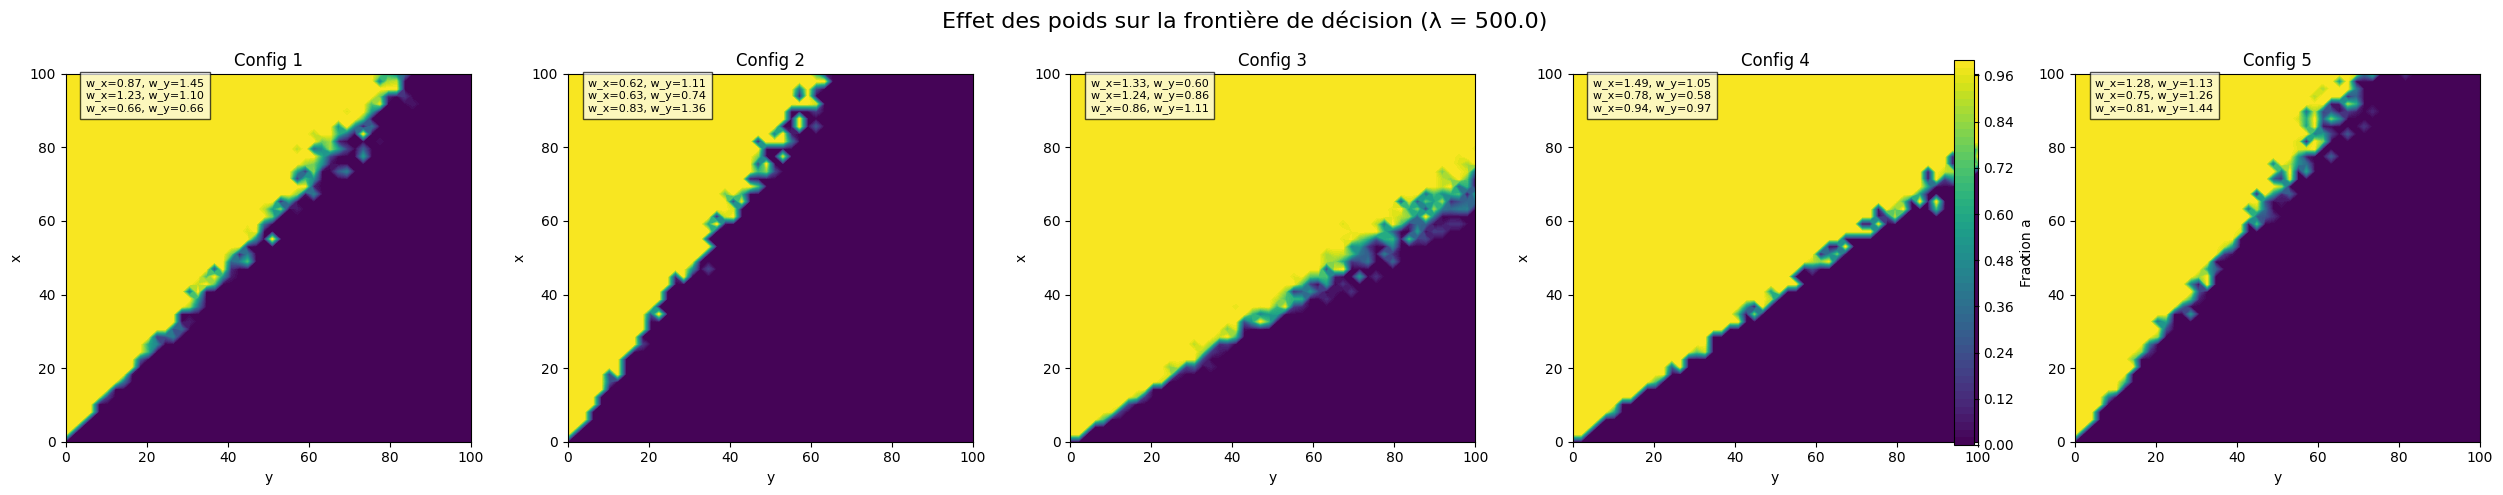

In [14]:
# --- MAIN ---
if __name__ == "__main__":

    all_results = []

    print("Comparaison de différentes configurations de poids...")

    for trial in range(n_trials):
        np.random.seed(42 + trial)
        neuron_weights = [
            (np.random.uniform(0.5, 1.5), np.random.uniform(0.5, 1.5))
            for _ in range(n_neurons)
        ]
        X_grid, Y_grid, Z_grid = run_simulation(
            n_layers, n_neurons, n_points,
            lambda_override=lambda_val,
            neuron_weights=neuron_weights
        )
        all_results.append((neuron_weights, Z_grid))

    # --- AFFICHAGE ---
    fig, axes = plt.subplots(1, n_trials, figsize=(5 * n_trials, 5))
    axes = np.atleast_1d(axes).flatten()

    for i, (weights, Z) in enumerate(all_results):
        im = axes[i].contourf(Y_grid, X_grid, Z, levels=50, cmap='viridis', vmin=0, vmax=1)
        label = "\n".join([f"w_x={w[0]:.2f}, w_y={w[1]:.2f}" for w in weights])
        axes[i].set_title(f"Config {i+1}")
        axes[i].set_xlabel("y")
        axes[i].set_ylabel("x")
        axes[i].text(5, 90, label, fontsize=8, bbox=dict(facecolor='white', alpha=0.7))

    cbar = plt.colorbar(im, ax=axes.tolist())
    cbar.set_label('Fraction a')

    plt.suptitle(f"Effet des poids sur la frontière de décision (λ = {lambda_val})", fontsize=16)
    plt.tight_layout()
    plt.show()


In [6]:
#--- Fixed weights simulation ---
# Paramètres globaux
lambda_a = 1.0
lambda_b = 1.0
ka = 0.3
kb = 0.8
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2


def neuron_dynamics(t, y, x_in, y_in, w_p_x=1.0, w_p_y=1.0):
    a, b = y
    da_dt = w_p_x * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = w_p_y * y_in + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, lambda_override=None, neuron_weights=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec)
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec)

    a_vec = []
    b_vec = []
    for i in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        w_p_x, w_p_y = neuron_weights[i] if neuron_weights is not None else (1.0, 1.0)

        sol = solve_ivp(
            neuron_dynamics, [0, 50], [0.0, 0.0],
            args=(x_in, y_in, w_p_x, w_p_y),
            method='LSODA'
        )

        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, lambda_override=None, neuron_weights=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, lambda_override=lambda_override, neuron_weights=neuron_weights)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, lambda_override=None, neuron_weights=None):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    total_points = X_grid.size
    iterator = tqdm(range(total_points), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]
        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]
        a_final, b_final = simulate_network_sum(np.array([X_input]), np.array([Y_input]),
                                               n_layers, n_neurons,
                                               neuron_weights=neuron_weights,
                                               lambda_override=lambda_override)
        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0
    return X_grid, Y_grid, Z_grid




Simulation:   0%|          | 0/2500 [00:00<?, ?it/s]

Simulation: 100%|██████████| 2500/2500 [00:00<00:00, 2924.51it/s]


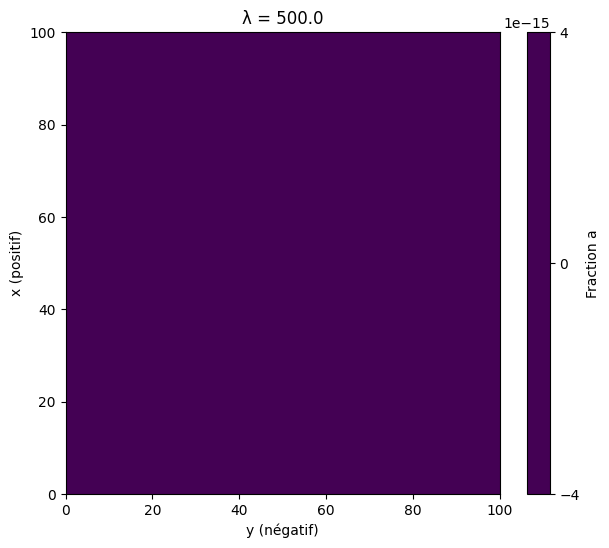

In [5]:

if __name__ == "__main__":

      # Paramètres globaux
    lambda_a = 1.0
    lambda_b = 1.0
    ka = 0.8
    kb = 0.8
    eta_a = 0.1
    eta_b = 0.1
    mu_ab = 0.2

    
    approach = 1
    n_layers = 1
    n_neurons = 3
    n_points = 50
    lambda_val = 500.0

    # Poids initiaux
    initial_weights = [
        [1.0, 0.2],
        [0.8,0.2],
        [0.8, 0.3],
    ]
    assert len(initial_weights) == n_neurons

    # Grille fixe pour affichage
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)

    # Calcul de la simulation avec la barre de progression tqdm
    weights = [(w[0], w[1]) for w in initial_weights]
    X_grid, Y_grid, Z_grid = run_simulation(
        n_layers, n_neurons, n_points,
        lambda_override=lambda_val,
        neuron_weights=weights
    )

    # Affichage statique
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)
    cbar = fig.colorbar(im, ax=ax, label="Fraction a")
    ax.set_xlabel("y (négatif)")
    ax.set_ylabel("x (positif)")
    ax.set_title(f"λ = {lambda_val}")

    plt.show()



In [10]:
# --- Functions for neuron dynamics and simulation ---
def neuron_dynamics(t, y, x_vec, y_vec, w_p_x_vec, w_p_y_vec): #prend en input les vecteurs d'inputs et vecteurs de poids
    a, b = y
    da_dt = np.dot(w_p_x_vec, x_vec) + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = np.dot(w_p_y_vec, y_vec) + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

def simulate_layer(X_bulk_vec, Y_bulk_vec, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    X_total = np.sum(X_bulk_vec)
    Y_total = np.sum(Y_bulk_vec)
    lambda_total = lambda_override if lambda_override is not None else (X_total + Y_total) / n_neurons

    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_bulk_vec / X_total if X_total > 0 else np.zeros_like(X_bulk_vec) #vecteur de proba pour la distribution parmis les especes positives
    q_vec = Y_bulk_vec / Y_total if Y_total > 0 else np.zeros_like(Y_bulk_vec) #vecteur de proba pour la distribution parmis les especes negatives

    a_vec = []
    b_vec = []
    for _ in range(n_neurons):
        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0

        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_bulk_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_bulk_vec)

        sol = solve_ivp(neuron_dynamics, [0, 50], [0.0, 0.0], args=(x_vec, y_vec, w_p_x_vec, w_p_y_vec), method='LSODA')
        a_vec.append(sol.y[0, -1])
        b_vec.append(sol.y[1, -1])

    return np.array(a_vec), np.array(b_vec)

def simulate_network_sum(X_vec, Y_vec, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    for _ in range(n_layers):
        a_out, b_out = simulate_layer(X_vec, Y_vec, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=lambda_override)
        X_vec = np.array([np.sum(a_out)])
        Y_vec = np.array([np.sum(b_out)])
        # Adapter poids : on réduit à un poids unique moyen (optionnel, selon modèle)
        w_p_x_vec = np.array([np.sum(w_p_x_vec)])
        w_p_y_vec = np.array([np.sum(w_p_y_vec)])
    return np.sum(X_vec), np.sum(Y_vec)

def simulate_network_vector(X, Y, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override=None):
    X_vec = np.full(n_neurons, X / n_neurons)
    Y_vec = np.full(n_neurons, Y / n_neurons)

    # Répéter les poids pour avoir le même nombre de neurones
    w_p_x_vec_rep = np.tile(w_p_x_vec / len(w_p_x_vec), n_neurons)
    w_p_y_vec_rep = np.tile(w_p_y_vec / len(w_p_y_vec), n_neurons)

    for _ in range(n_layers):
        X_vec, Y_vec = simulate_layer(X_vec, Y_vec, n_neurons, w_p_x_vec_rep, w_p_y_vec_rep, lambda_override=lambda_override)

    return np.sum(X_vec), np.sum(Y_vec)

def run_simulation(n_layers, n_neurons, n_points, w_p_x_vec, w_p_y_vec, lambda_override=None):
    """Run simulation for a given lambda value"""
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    lambda_str = f"λ={lambda_override}" if lambda_override is not None else "λ=auto"
    iterator = tqdm(range(X_grid.size), desc=f"Simulation {lambda_str}")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]

        X_input = X_grid[i, j]
        Y_input = Y_grid[i, j]

        if approach == 1:
            a_final, b_final = simulate_network_sum(
                np.array([X_input]), np.array([Y_input]), n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override)
        elif approach == 2:
            a_final, b_final = simulate_network_vector(
                X_input, Y_input, n_layers, n_neurons, w_p_x_vec, w_p_y_vec, lambda_override)
        else:
            raise ValueError("Approach must be 1 or 2")

        Z_grid[i, j] = a_final / (a_final + b_final) if (a_final + b_final) > 0 else 0.0

    return X_grid, Y_grid, Z_grid



## (B) Multilayers Neural Network

We review here the exchange of informations between two hidden layers. Therefore, $a,b$ refer both to the output of the previous hidden layer and to the input (which are usually called $x,y$) of the next hidden layer. Hence, $a,b$ plays the role of positive and negative inputs for the neurons of the following layer. 

After discussion with the experimental team, it seems that only $a$ has to be propagated. Though, not propagating $b$ (which is degradated afterward) between layers leads to a lack of negative inputs for neurons of the following layer. For hidden layers, instead of $a_j$, we denote by $H_{j(\text{l})}$ the output of the neuron $j$o f the layer $l$. This output will also be the positive input of the next layer. Yet, a neuron still need positive and negative inputs. Therefore, we can directly add $N$ inputs onto the bead. In this configuration, only positive inputs are propagated, and the threshold is redefined as $\theta + N$, where $N$ is a fixed input set by the user and does not depend on the negative outputs from the previous layer. With this manupulation, we can add layers and still understanding the dynamics (each neuron is branched to another through one positive input link instead of a positive and negative link). Such an architectur is shown below : 



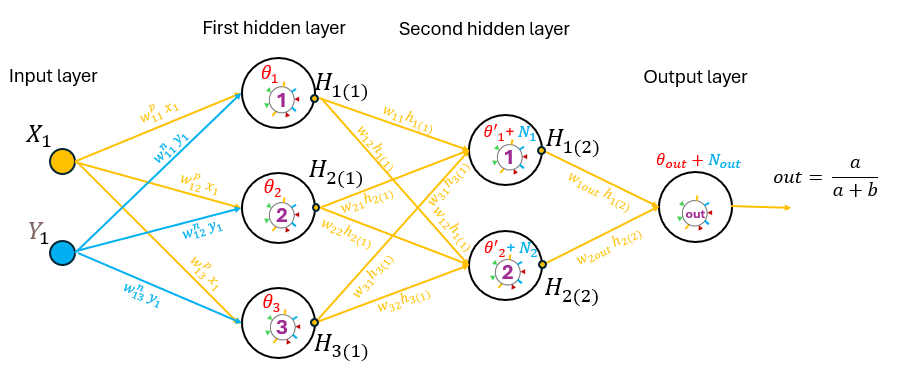

The first layer functions exactly like the monolayer architecture: the inputs to the first hidden layer are sampled as $x_1, y_1 \sim P_{\lambda}$. Each neuron $j$ in the first hidden layer then computes its dynamics and propagates only its *positive output*, denoted $H_{j(1)}$.

Because we use a *compartmentalized pooling dynamics*, the connection between neurons across layers is stochastic. Specifically, neurons in the second hidden layer receive as inputs $h_{1(1)}, h_{2(1)}, h_{3(1)}$, which are drawn from the outputs $H_{1(1)}, H_{2(1)}, H_{3(1)}$ according to the distribution $P_\lambda$.

The weights between neurons $j$ in the first hidden layer and neuron $k$ in the second hidden layer, denoted $w_{jk}$, depend on the template concentrations within the droplets, and can be adjusted by the experimenter.

As previously explained, since only *positive inputs* are propagated, we introduce *negative inputs* directly onto each neuron. For the second hidden layer neurons, we define the positive input as $P = \sum_j w_{jk} h_{j(1)}$. A neuron $k$ in the second hidden layer activates if $P \geq N + \theta_k'$, where $N$ is the negative input, and $\theta_k'$ is the activation threshold, again dependent on initial conditions.

Each neuron $k$ in the second hidden layer evolves according to the differential equations $\frac{dH_{k(2)}}{dt} = \sum_j w_{jk} h_{j(1)} + \dots$ for the positive inputs, and similarly for the negative species. Once the system reaches its steady state, only the positive outputs $H_{k(2)}$ are propagated to the next layer.

The output layer then receives as inputs $h_{1(2)}, h_{2(2)}$, drawn from the positive outputs $H_{1(2)}, H_{2(2)}$ according to the distribution $P_\lambda$. Again, because negative species are not propagated, we introduce an additional *fixed negative input* $N_{\text{out}}$ directly into the bead.

The output neuron evolves according to $\frac{da}{dt} = \sum_k w_{k,\text{out}} h_{k(2)} + \dots$ and $\frac{db}{dt} = N + \dots$. At steady state, the final output is given by the fraction, $\text{output} = \frac{a}{a + b}$. Due to bistability in the system, this final output will converge to either 0 or 1, resulting in a binary decision.


### B.1 Classification exemple 
To better understand how does inputs are processed by the neural network only propagating positive signal, one can starts by analyzing a monolayer CNN. Ici, puisque toutes les outputs de la couche cachée sont propagées dans un seul neuron de sortie, $H_{j(1)}=h_{j(1)}$.

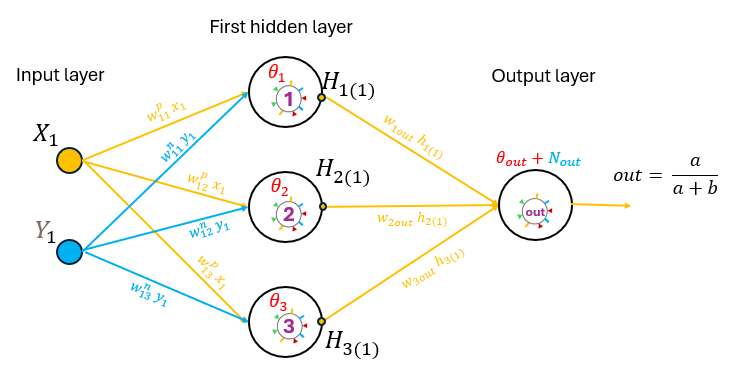

Considering this feedforward network with one input, hidden and output layer, which implement a classifier that separates the input space spanned by $X_1,X_2 \in \mathbb{R}^+$ into two classes based on wether the classification criterions are satisfied.
The neurons of the hidden layer respectively encode the following activation conditions:

- $w^p_{11}x_1 - w^n_{11}y_1 \geq \theta_1$
- $w^p_{12}x_1 - w^n_{12}y_1 \geq \theta_2$
- $w^p_{13}x_1 - w^n_{13}y_1 \geq \theta_3$

and propagate the positive species, which is either $h_{1(1)}(P_1,N_1), h_{2(1)}(P_2,N_2), h_{3(1)}(P_3,N_3)$ or 0. The output layer therefore receives the signals  $h_{1(1)}(P_1,N_1), h_{2(1)}(P_2,N_2), h_{3(1)}(P_3,N_3)$ and evaluates whether

$$\sum_j w_{j, \text{out}} h_{j(1)} \geq \theta_{\text{out}} + N_{\text{out}}$$

Nénanmoins, même si la somme des entrées est constante, la somme des sorties de l'hidden layer ne l'est pas forcément, car chaque neurone répond non lineairement différement à la même entré (à cause des poids différents.) La realation entre entrées $P,N$ et serotie $h_{j(1)}(P_j,N_j)$ n'est pas linéaire. Le seul moyen d'obtenir une somme de sorties constante est de rendre tous les neurones identiques (même poids et seuils). Si l'on écrit une condition booléeene, cette dernière dépendra des valeurs des entrées $X_1,Y_1$, ce qui pour des application pratique n'est pas l'idéal.
Essayons tout de même, dans le cas où $X_1+Y_1=cst$ fixée. 
Choisissons par exemple les poids $w^p_{11}=5, w^p_{12}=-2,w^p_{13}=2, w^n_{11}=-1, w^n_{22}=4,w^n_{23}=2, \theta_1=\theta_2=\theta_3=0$ et imaginious que nous voulions obtenir
Dans ce cas, on peut tout à fait déterminer les poids et seuil du neurone de sortie pour obtenir 

Yet, the linear inequality can be associated with a Boolean logic formula by tuning the weights accordingly. Such a conversion is always possible since any Boolean function can be represented by a neural network with a single hidden layer (universal approximation theorem).  However, this conversion requires interpreting the outputs of the hidden neurons as Boolean variables. In the paper by F. Fages *et al.*, *Reconfigurable Neuromorphic Computation in Biochemical Systems*, the neurons are bistable with outputs $(v_{(0)} = 0, v_{(1)} \neq 0)$ (on) and $(v_{(0)} \neq 0, v_{(1)} = 0)$ (off). In that system, the "on" value $v_{(1)} \neq 0$ is a constant (bounded), since $[v_{(0)}] + [v_{(1)}] = \text{const}$. It is therefore entirely possible to interpret this constant output as a Boolean variable, i.e., $v_{(1)} \neq 0 = \text{const} \rightarrow v_{(1)} = 1$.

This is not the case in our system: for the "on" state where $a \neq 0$, the fixed point value of $a$ is not a constant, but depends on the inputs. As a result, it is not possible to directly associate this state with the value "1". Consequently, the above linear inequality cannot be directly interpreted as a Boolean logic formula without further processing. For example, if one want to obtain $h_1 \text{ or } (h_2\text{ and }h_3)$, then as $h_j$ are not bounded, 



### The boolean issue
The issue arises when one include the compartmentalization dynamics with the sampling of inputs. As the inputs get random, $P_j,N_j$ become random variable aswell, and consequently, $h_{j(1)}$ is a function of random numbers. Dans ce cas, $\sum_j h_{j(1)}$ n'est pas constante, car jamais la même entre chaque tirage, quand bien même les poids et les entrées seraient fixés. En effet, la somme des sorties dépend non linéairements des tirages individuels. Le seul moyen d'obtenir une somme de sorties constante en moyenne est que tous les neurones soient identiques, mais en l'état, la moyenne n'est jamais la même car les sorties sont aléatoires.

### Méthode 1
Let us try to solve the problem by looking at the "on" fixed point value ($a,b\approx0)$. In this case, $a>>b$, hence the set of governing equation at the "on" fixed point reduces to 

$$P+\frac{\lambda_a^*}{1+k_a a^*}-\eta_a a^*=0$$
$$N-\mu_ba^*b^*=0$$
So $b^*=\frac{N}{\mu_ba^*}$. $a^*$ is given the solution of the quadratic equation : $P(1+k_aa^*)+\lambda_aa^*-\eta_a a^*(1+k_aa^*)=0$ which admits two roots but we can show that only the bigger is the correct one. Hence, an approximation for the fixed point values is $$a^* = \frac{  (P k_a + \lambda_a - \eta_a) + \sqrt{(P k_a + \lambda_a - \eta_a)^2 + 4\eta_a k_aP} }{2\eta_a k_a}$$
Nevertheless, as we neglect the coupling, this approximation is an upper boundary, because the coupling effectively decreases the growth of $a$.

Nous proposons une analyse coarse grain pour essayer de retrouver une équation booléene pour notre reseau de neurone. Si un neurone s'active si $P\geq N+\theta(a_0,b_0)$. En se plaçant à distance de la frontière de décision $P=N$ (près de laquelle il est impossible d'obtenir une équation analytique de $a^*$), alors l'output d'un neurone "on" sera donné par $a^*$.  

### Méthode 2 
 
On peut aussi utiliser la fraction $\frac{a^*}{a^*+b^*}\in [0,1]$, variable quasi booléenne puisque les points fixes stables correspondent environ à 0 ou 1. Cette approche est bien plus simple mais la question est de savoir comment implémenter et traduire une fraction chimiquement. Comme dit plus haut, après discussion, ce sont les templates qui sont introduits dans la goutte par l'experimentateur, tandis que les billes elles capturent les inputs en solution avant compartimentalisation. En conséquence, il est possible de 

### Méthode 3
Puisque les sorties ne sont pas normalisées à 0 ou 1 mais dépendant de l'intensité des entrées, on parle de variable floue binaire, puisqu'elle est réelle mais elle fonctionne de manière logique dans son interpretation. 
On travailler avec des $h_j\in R^+$ mais on va pouvoir les approximer par $\bar{h}_j:=\mathbb{1}_{h_{j(1)}}\in[0,1]$ pour une certaine valeur seuil $\delta$ qui permet de couper l'intensité des inputs, selon la dynamique observée. 
### Conclusion et amélioration de l'architecture
Le réseau de neurone actuel peut être compris par une succesion de conditions d'activations pour chaque neurone, du type $P\geq N+\theta(a_0,b_0) \rightarrow on$. Cependant, il pourrait être puissant de passer de pouvoir associer un formalisme booléen à ce réseau de neurone incluant des "or, and..." ce qui est théoriquement permis par cette architecture (il existe déjà d'autres architectures, notamment de type WTA, à base de DNA et d'enzymes qui permettent de faire des classification booléenes, comme dans le papier de A. Genot et *al*, *Scaling down DNA circuits with competitive neural networks*). Cependant, il nous faudrait pouvoir interpreter les sorties de chaque neurone comme une variable booléenne. En l'état ce n'est pas possible, puisque l'output d'un neuron, i.e. le point fixe $(a^*,b^*)$ dépend de P,N et des constants cinétiques. En conséquence, cette output n'est pas bornée et il n'est pas possible d'associer au $max(a^*)$ un 1, car dans ce cas, plusieurs valeurs de $a^*$ seraient associées à un signal d'activation, ce qui est ininterprétable pour les neurones suivantes. Le papier de F. Fages et *al*, *Reconfigurable Neuromorphic Computation in Biochemical Systems*, en introduisant des réactions intermediaires de sorte à obtenir des outputs bornées.

We simulate a chemical neural network with one hidden layer and 3 neurons. Only positive species are propagated.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tqdm import tqdm
import math  # Needed for functions like log, exp, etc.
from graphviz import Digraph

In [3]:
# ---------------------
# DYNAMIQUE DES NEURONES
# ---------------------

def neuron_dynamics_hidden(t, y, x_vec, y_vec, w_p_vec, w_n_vec):
    a, b = y
    da_dt = np.dot(w_p_vec, x_vec) + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = np.dot(w_n_vec, y_vec) + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

def neuron_dynamics_output(t, y, x_in, w_p, theta, N):
    a, b = y
    da_dt = w_p * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]

# ---------------------
# SIMULATIONS DE COUCHES
# ---------------------

def simulate_hidden_layer(X_vec, Y_vec, neuron_weights):
    X_total = np.sum(X_vec)
    Y_total = np.sum(Y_vec)
    lambda_total = (X_total + Y_total) / len(neuron_weights)
    r = X_total / (X_total + Y_total) if (X_total + Y_total) > 0 else 0.0
    p_vec = X_vec / X_total if X_total > 0 else np.zeros_like(X_vec)
    q_vec = Y_vec / Y_total if Y_total > 0 else np.zeros_like(Y_vec)

    a_vec = []

    for i, (w_p_vec, w_n_vec) in enumerate(neuron_weights):

        n = np.random.poisson(lambda_total)
        m = np.random.binomial(n, r) if n > 0 else 0
        x_vec = np.random.multinomial(m, p_vec) if m > 0 else np.zeros_like(X_vec)
        y_vec = np.random.multinomial(n - m, q_vec) if (n - m) > 0 else np.zeros_like(Y_vec)
        x_in = np.sum(x_vec)
        y_in = np.sum(y_vec)

        sol = solve_ivp(neuron_dynamics_hidden, [0, 2000], [0.0, 0.0],
                args=(x_vec, y_vec, w_p_vec, w_n_vec),
                method='LSODA')

        a_vec.append(sol.y[0, -1])

    return np.array(a_vec)

def simulate_output_layer(a_vec, output_weights, theta_out, N_out):
    x_in = np.dot(output_weights, a_vec)
    sol = solve_ivp(neuron_dynamics_output, [0, 2000], [0.0, 0.0],
                    args=(x_in, 1.0, theta_out, N_out),
                    method='LSODA')
    a, b = sol.y[0, -1], sol.y[1, -1]
    return a / (a + b + 1e-8) if (a + b) > 0 else 0.0

def simulate_network(X_vec, Y_vec, neuron_weights, output_weights, theta_out, N_out):
    a_hidden = simulate_hidden_layer(X_vec, Y_vec, neuron_weights)
    return simulate_output_layer(a_hidden, output_weights, theta_out, N_out)

# ---------------------
# GRILLE & AFFICHAGE
# ---------------------

def run_simulation(n_points, neuron_weights, output_weights, theta_out, N_out):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    total_points = X_grid.size
    iterator = tqdm(range(total_points), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]
        x_input = X_grid[i, j]
        y_input = Y_grid[i, j]
        output = simulate_network(
            np.array([x_input]), np.array([y_input]),
            neuron_weights, output_weights,
            theta_out, N_out
        )
        Z_grid[i, j] = output

    return X_grid, Y_grid, Z_grid

def draw_neural_net_from_weights(neuron_weights, output_weights):
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', size='10')

    # Style global des noeuds
    dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

    # Entrées
    dot.node('X1', 'X₁', color='gold', fillcolor='gold')
    dot.node('Y1', 'Y₁', color='deepskyblue', fillcolor='deepskyblue')

    # Couche cachée
    for i, (w_p, w_n) in enumerate(neuron_weights):
        hid_id = f'H{i+1}'
        theta = f'θ{i+1}'
        label = f'{hid_id}(1)\n{theta}'
        dot.node(hid_id, label, color='black', fillcolor='white')

        dot.edge('X1', hid_id, label=f'{w_p:.1f}', color='orange')
        dot.edge('Y1', hid_id, label=f'{w_n:.1f}', color='deepskyblue')

    # Neurone de sortie
    dot.node('OUT', 'OUT\nθ_out + N_out', shape='doublecircle', color='black', fillcolor='white')

    for i, w in enumerate(output_weights):
        hid_id = f'H{i+1}'
        dot.edge(hid_id, 'OUT', label=f'{w:.1f}', color='goldenrod')

    return dot



Simulation: 100%|██████████| 1600/1600 [00:41<00:00, 38.38it/s]


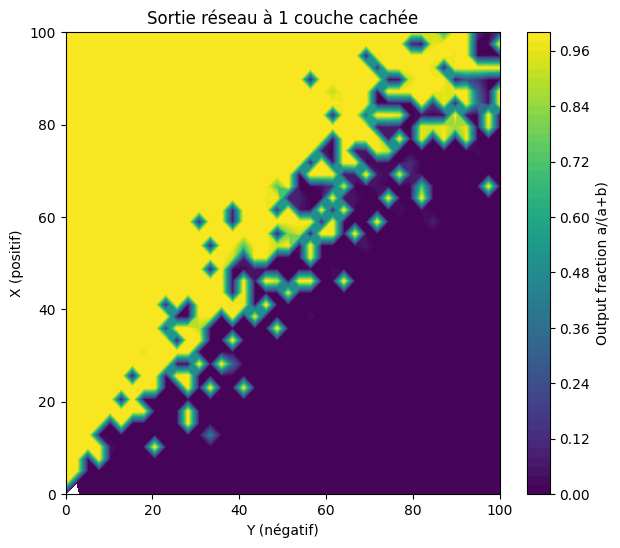

In [4]:
# ---------------------
# MAIN
# ---------------------

if __name__ == "__main__":
    
    # ---------------------
    # PARAMÈTRES GLOBAUX
    # ---------------------
    lambda_a = 1.0
    lambda_b = 1.0
    ka = 0.3
    kb = 0.8
    eta_a = 0.1
    eta_b = 0.1
    mu_ab = 0.2

    n_points = 40
    neuron_weights = [
        (1.0, 1.5),
        (0.8, 0.3),
        (0.9, 1.2),
    ]
    output_weights = [1.3, 0.5, 1.6]
    theta_out = 1.0
    N_out = 100.0

    
    graph = draw_neural_net_from_weights(neuron_weights, output_weights)
    graph.render('/mnt/data/dynamic_chemical_net', cleanup=True)
    graph.view('/mnt/data/dynamic_chemical_net')

    X_grid, Y_grid, Z_grid = run_simulation(
        n_points,
        neuron_weights,
        output_weights,
        theta_out,
        N_out
    )

    # AFFICHAGE
    fig, ax = plt.subplots(figsize=(7, 6))
    im = ax.contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)
    cbar = fig.colorbar(im, ax=ax, label="Output fraction a/(a+b)")
    ax.set_xlabel("Y (négatif)")
    ax.set_ylabel("X (positif)")
    ax.set_title("Sortie réseau à 1 couche cachée")

    plt.show()

### Version sans compartimentalisation

Simulation: 100%|██████████| 1600/1600 [00:21<00:00, 73.90it/s]


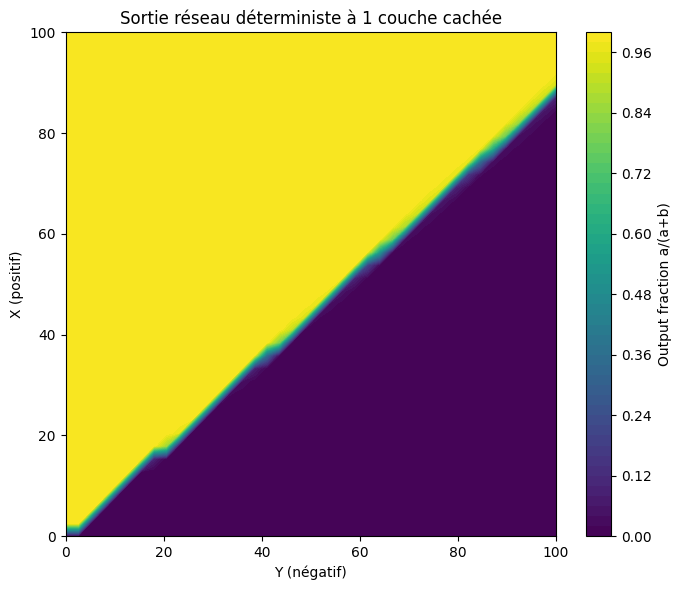

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from graphviz import Digraph
from tqdm import tqdm

# ---------------------
# PARAMÈTRES GLOBAUX
# ---------------------
lambda_a = 1.0
lambda_b = 1.0
ka = 0.3
kb = 0.8
eta_a = 0.1
eta_b = 0.1
mu_ab = 0.2


# ---------------------
# DYNAMIQUE DES NEURONES
# ---------------------

def neuron_dynamics_hidden(t, y, x_vec, y_vec, w_p_vec, w_n_vec):
    a, b = y
    da_dt = np.dot(w_p_vec, x_vec) + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = np.dot(w_n_vec, y_vec) + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]


def neuron_dynamics_output(t, y, x_in, w_p, theta, N):
    a, b = y
    da_dt = w_p * x_in + (lambda_a * a) / (1 + ka * a) - eta_a * a - mu_ab * a * b
    db_dt = N + (lambda_b * b) / (1 + kb * b) - eta_b * b - mu_ab * a * b
    return [da_dt, db_dt]


# ---------------------
# SIMULATIONS DE COUCHES
# ---------------------

def simulate_hidden_layer(X_vec, Y_vec, neuron_weights):
    a_vec = []
    for w_p_vec, w_n_vec in neuron_weights:
        sol = solve_ivp(neuron_dynamics_hidden, [0, 2000], [0.0, 0.0],
                        args=(X_vec, Y_vec, np.array([w_p_vec]), np.array([w_n_vec])),
                        method='LSODA')
        a_vec.append(sol.y[0, -1])
    return np.array(a_vec)


def simulate_output_layer(a_vec, output_weights, theta_out, N_out):
    x_in = np.dot(output_weights, a_vec)
    sol = solve_ivp(neuron_dynamics_output, [0, 2000], [0.0, 0.0],
                    args=(x_in, 1.0, theta_out, N_out),
                    method='LSODA')
    a, b = sol.y[0, -1], sol.y[1, -1]
    return a / (a + b + 1e-8) if (a + b) > 0 else 0.0


def simulate_network(X_vec, Y_vec, neuron_weights, output_weights, theta_out, N_out):
    a_hidden = simulate_hidden_layer(X_vec, Y_vec, neuron_weights)
    return simulate_output_layer(a_hidden, output_weights, theta_out, N_out)


# ---------------------
# GRILLE & AFFICHAGE
# ---------------------

def run_simulation(n_points, neuron_weights, output_weights, theta_out, N_out):
    x_vals = np.linspace(0, 100, n_points)
    y_vals = np.linspace(0, 100, n_points)
    Y_grid, X_grid = np.meshgrid(y_vals, x_vals)
    Z_grid = np.zeros_like(X_grid)

    total_points = X_grid.size
    iterator = tqdm(range(total_points), desc="Simulation")

    for idx in iterator:
        i = idx // X_grid.shape[1]
        j = idx % X_grid.shape[1]
        x_input = X_grid[i, j]
        y_input = Y_grid[i, j]
        output = simulate_network(
            np.array([x_input]), np.array([y_input]),
            neuron_weights, output_weights,
            theta_out, N_out
        )
        Z_grid[i, j] = output

    return X_grid, Y_grid, Z_grid


def draw_neural_net_from_weights(neuron_weights, output_weights):
    dot = Digraph(format='png')
    dot.attr(rankdir='LR', size='10')
    dot.attr('node', shape='circle', style='filled', fontname='Helvetica')

    # Entrées
    dot.node('X1', 'X₁', color='gold', fillcolor='gold')
    dot.node('Y1', 'Y₁', color='deepskyblue', fillcolor='deepskyblue')

    # Couche cachée
    for i, (w_p, w_n) in enumerate(neuron_weights):
        hid_id = f'H{i+1}'
        theta = f'θ{i+1}'
        label = f'{hid_id}(1)\n{theta}'
        dot.node(hid_id, label, color='black', fillcolor='white')

        dot.edge('X1', hid_id, label=f'{w_p:.1f}', color='orange')
        dot.edge('Y1', hid_id, label=f'{w_n:.1f}', color='deepskyblue')

    # Neurone de sortie
    dot.node('OUT', 'OUT\nθ_out + N_out', shape='doublecircle', color='black', fillcolor='white')

    for i, w in enumerate(output_weights):
        hid_id = f'H{i+1}'
        dot.edge(hid_id, 'OUT', label=f'{w:.1f}', color='goldenrod')

    return dot


# ---------------------
# MAIN TEST
# ---------------------

n_points = 40
neuron_weights = [
    (1.0, 1.0),
    (0.8, 0.8),
    (1.2, 1.2),
]
output_weights = [1.0, 0.3, 1.0]
theta_out = 1.0
N_out = 10.0

graph = draw_neural_net_from_weights(neuron_weights, output_weights)
graph_path = "/mnt/data/dynamic_chemical_net_deterministic"
graph.render(graph_path, cleanup=True)

X_grid, Y_grid, Z_grid = run_simulation(
    n_points,
    neuron_weights,
    output_weights,
    theta_out,
    N_out
)

fig, ax = plt.subplots(figsize=(7, 6))
im = ax.contourf(Y_grid, X_grid, Z_grid, levels=50, cmap='viridis', vmin=0, vmax=1)
cbar = fig.colorbar(im, ax=ax, label="Output fraction a/(a+b)")
ax.set_xlabel("Y (négatif)")
ax.set_ylabel("X (positif)")
ax.set_title("Sortie réseau déterministe à 1 couche cachée")
plt.tight_layout()
plt.show()


Bien sûr, la compartimentalisation ajoute du bruit à la frontière de décision en comparaison avec la version déterministe. Ce bruit doit donc être évalué en comparaison avec le bruit induit par le cross talk  entre les neurones. Ce dernier devrait être grandement diminué par l'introduction de la compartimentalisation.

## 3.Analytical work

regarder la dépendance en lambda (papier gabin) lambda environ 1 regime particulier. regarder ce qu'il se passe quand lambda est de 1. \deltax = \delta a pour moi entre le debut et la fin du premier round. fraction de a après un round en fonction de lambda det on drevait voir 2 zones . comparer avec diagramme bulk si lambda>>>1 et tj meme chose alors cpt joue pas

# 4. Travail à poursuivre et directions à explorer
